In [4]:
import pandas as pd
df=pd.read_csv('UniversityRanking_2022.csv')
df


,Institute Id,Institute Name,City,State,Score,Rank,TLR,RPC,GO,OI,Perception
0,IR-O-U-0220,Indian Institute of Science,Bengaluru,Karnataka,82.67,1,79.13,91.48,78.23,58.39,100.00
1,IR-O-U-0109,Jawaharlal Nehru University,New Delhi,Delhi,67.99,2,71.19,44.96,95.07,73.36,67.88
2,IR-O-U-0500,Banaras Hindu University,Varanasi,Uttar Pradesh,64.02,3,64.50,45.00,100.00,53.13,58.57
3,IR-O-U-0570,Calcutta University,Kolkata,West Bengal,62.06,4,66.20,43.92,91.72,60.98,45.77
4,IR-O-U-0436,Amrita Vishwa Vidyapeetham,Coimbatore,Tamil Nadu,61.23,5,64.23,54.33,71.35,65.54,48.36
...,...,...,...,...,...,...,...,...,...,...,...
96,IR-O-U-0121,Goa University,Goa,Goa,38.96,96,48.86,15.05,60.91,55.96,20.01
97,IR-O-U-0043,"Vignan's Foundation for Science, Technology an...",Guntur,Andhra Pradesh,38.92,97,49.40,15.25,60.65,56.03,18.00
98,IR-O-U-0555,Graphic Era University,Dehradun,Uttarakhand,38.91,98,47.99,9.74,60.76,62.23,32.17
99,IR-O-U-0223,"Jain university, Bangalore",Bengluru,Karnataka,38.89,99,39.29,12.72,73.89,59.54,25.52


In [3]:
df.shape

(101, 11)

In [5]:
df.isnull().sum()

Institute Id      0
Institute Name    0
City              0
State             0
Score             0
Rank              0
TLR               0
RPC               0
GO                0
OI                0
Perception        0
dtype: int64

In [6]:
df.isnull().sum().sum()

0

In [76]:
#importing libraries
import pandas as pd
import numpy as nm
import matplotlib.pyplot as mtp

#importing dataset
dataset=pd.read_csv('UniversityRanking_2022.csv')

#extracting independent and dependent variables
x=dataset.iloc[:,[8,4]].values
y=dataset.iloc[:,5].values

#splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.transform(x_test)


## filling the random forest algorithm to training set

In [77]:
#filling desicion tree classifier to the training set
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=5,criterion="entropy")
classifier.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=5)

## predecting the test set result

In [78]:
#predicting the test set result
y_pred=classifier.predict(x_test)

## creating the confustion matrix

In [79]:
#creating a confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

## visulaizing the training set result

C:\Users\R.MUNIRANJANI\AppData\Local\Temp\ipykernel_23140\1671820996.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('blue','black'))(i),label=j)


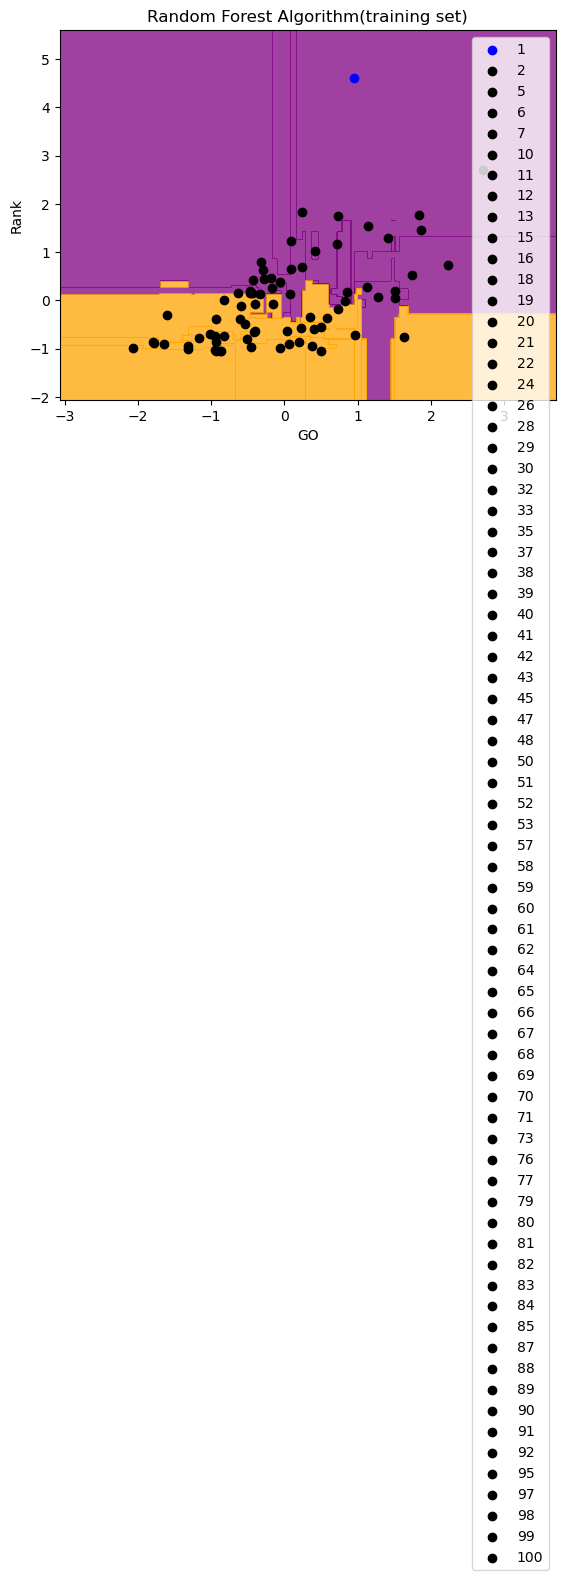

In [81]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2=nm.meshgrid(nm.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  nm.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
mtp.contourf(x1,x2,classifier.predict(nm.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
                                      alpha=0.75,cmap=ListedColormap(('purple','orange')))
mtp.xlim(x1.min(),x1.max())
mtp.ylim(x2.min(),x2.max())
for i,j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('blue','black'))(i),label=j)
mtp.title('Random Forest Algorithm(training set)')
mtp.xlabel('GO')
mtp.ylabel('Rank')
mtp.legend()
mtp.show()

C:\Users\R.MUNIRANJANI\AppData\Local\Temp\ipykernel_23140\2265926231.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('blue','black'))(i),label=j)


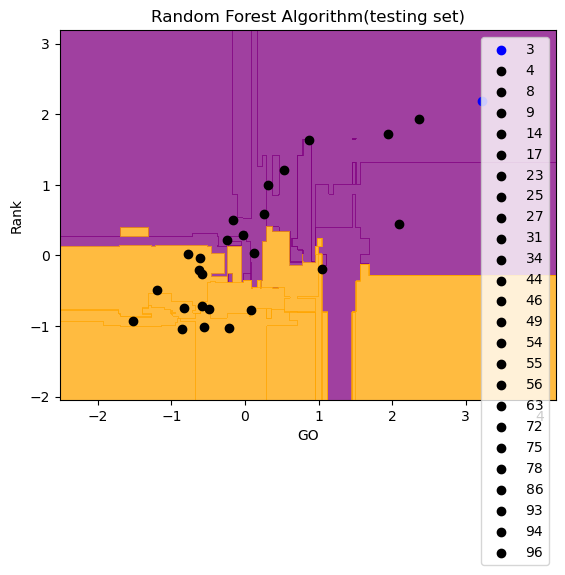

In [82]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
x1,x2=nm.meshgrid(nm.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  nm.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))
mtp.contourf(x1,x2,classifier.predict(nm.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
                                      alpha=0.75,cmap=ListedColormap(('purple','orange')))
mtp.xlim(x1.min(),x1.max())
mtp.ylim(x2.min(),x2.max())
for i,j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('blue','black'))(i),label=j)
mtp.title('Random Forest Algorithm(testing set)')
mtp.xlabel('GO')
mtp.ylabel('Rank')
mtp.legend()
mtp.show()